In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sn
import keras


In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


<Axes: ylabel='count'>

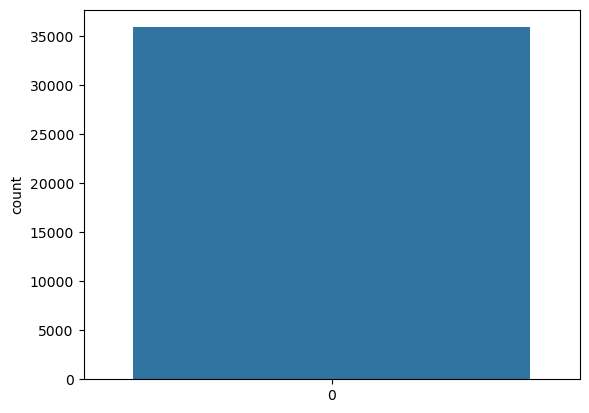

In [4]:
df=pd.read_csv("C:\\Users\\MudraboinaSowryasree\\Downloads\\fer2013.csv")
print(df)
sn.countplot(df['emotion'])

In [5]:
label_to_text={0:"anger",
               1:"disgust",
               2:"fear",
               3:"happiness",
               4:"sadness",
               5:"surprise",
               6:"neutral"}

In [6]:
df.isnull().sum()


emotion    0
pixels     0
Usage      0
dtype: int64

In [7]:
np.array(df.pixels.loc[0].split(" ")).reshape(48,48)


array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

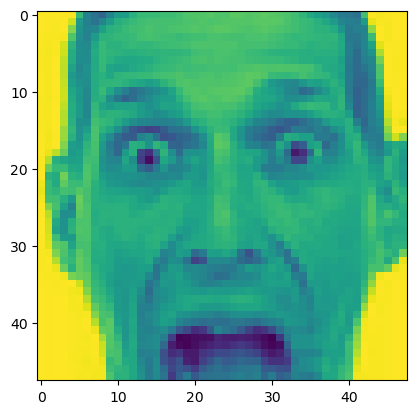

In [8]:
plt.imshow(np.array(df.pixels.loc[9].split(" ")).reshape(48,48).astype('float'))


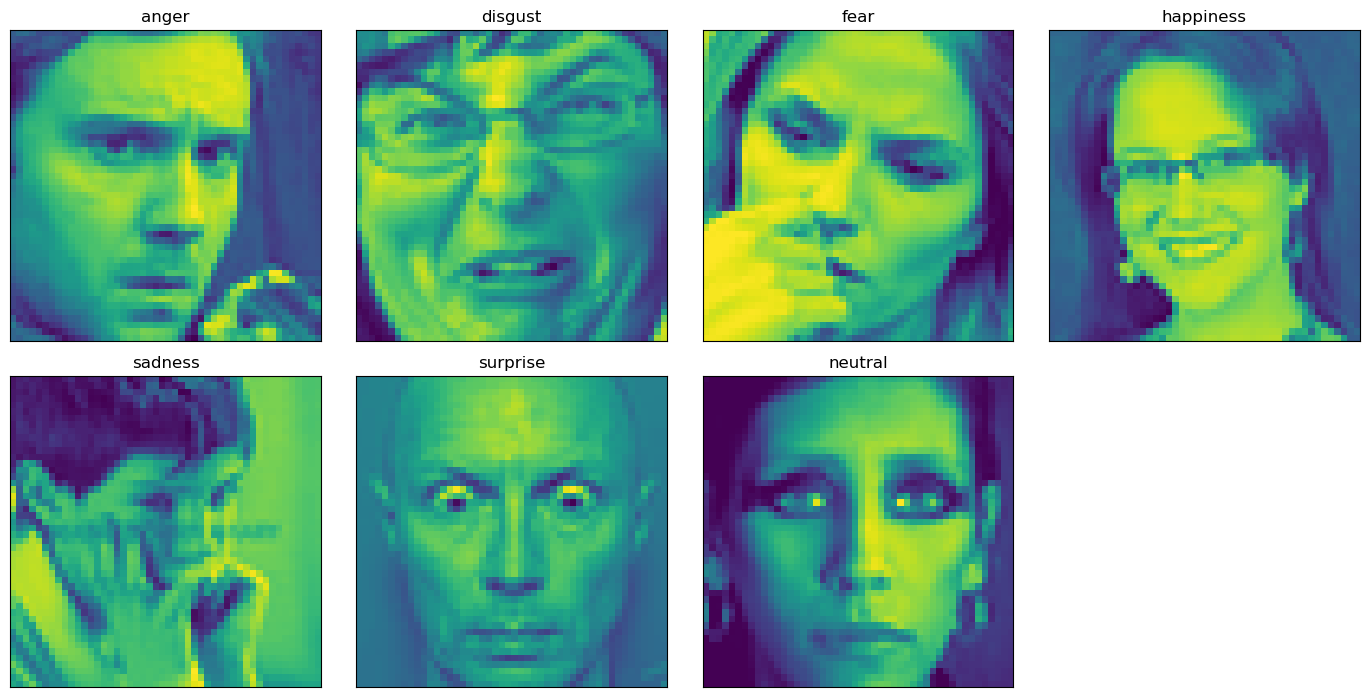

In [9]:
fig=plt.figure(1,(14,14))
k=0
for label in sorted(df.emotion.unique()):
  for j in range(1):
    px=df[df.emotion==label].pixels.iloc[j]
    px=np.array(px.split(' ')).reshape(48,48).astype('float32')
    k+=1
    a=plt.subplot(4,4,k)
    a.imshow(px)
    a.set_xticks([])
    a.set_yticks([])
    a.set_title(label_to_text[label])
    plt.tight_layout()

In [10]:
img_array=df.pixels.apply(lambda x:np.array(x.split(' ')).reshape(48,48,1).astype('float32'))

In [11]:
img_array=np.stack(img_array,axis=0)

In [12]:
img_array.shape

(35887, 48, 48, 1)

In [13]:
labels=df.emotion.values

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(img_array,labels,test_size=0.2)


In [15]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((28709, 48, 48, 1), (28709,), (7178, 48, 48, 1), (7178,))

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
basemodel=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
                                      tf.keras.layers.MaxPool2D(2,2),

                                      tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
                                      tf.keras.layers.MaxPool2D(2,2),

                                      tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)),
                                      tf.keras.layers.MaxPool2D(2,2),

                                      tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(48,48,1)),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1000,activation='relu'),
                                      tf.keras.layers.Dense(7,activation='softmax')
                                      ])


C:\Users\MudraboinaSowryasree\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
basemodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         257,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,847 (2.49 MB)

 Trainable params: 651,847 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
import os
try:
  os.mkdir('checkpoint')
except:
  pass

In [21]:
filename='bestmodel.keras'
checkpoint_path=os.path.join('checkpoint',filename)
call_back=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_freq='epoch',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='max')


In [22]:
hist=basemodel.fit(x_train,y_train,epochs=5,validation_split=0.1,callbacks=call_back)

Epoch 1/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2463 - loss: 1.8122
Epoch 1: val_accuracy improved from -inf to 0.38767, saving model to checkpoint\bestmodel.keras
808/808 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.2464 - loss: 1.8121 - val_accuracy: 0.3877 - val_loss: 1.5517
Epoch 2/5
807/808 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4240 - loss: 1.4774
Epoch 2: val_accuracy improved from 0.38767 to 0.46290, saving model to checkpoint\bestmodel.keras
808/808 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.4241 - loss: 1.4773 - val_accuracy: 0.4629 - val_loss: 1.3649
Epoch 3/5
807/808 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5098 - loss: 1.2909
Epoch 3: val_accuracy improved from 0.46290 to 0.51271, saving model to checkpoint\bestmodel.keras
808/808 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.5098 - loss: 1.2909 - val_accuracy: 0.5127 - val_loss: 1.2842
Epoch 4/5
808/808 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5574 - loss: 1.1660
Epoch

In [23]:

hist=hist.history

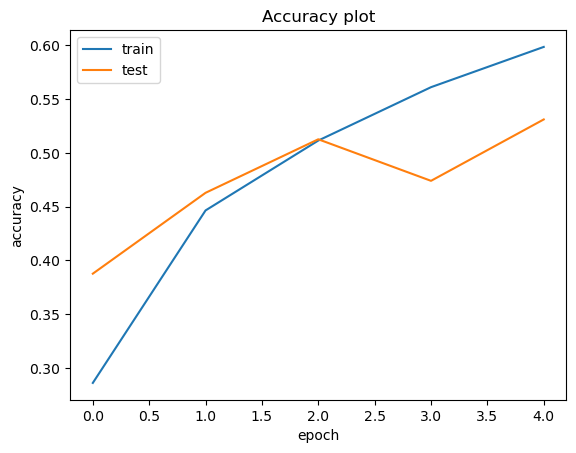

In [24]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('Accuracy plot')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('CNNv2_accuracy.png')


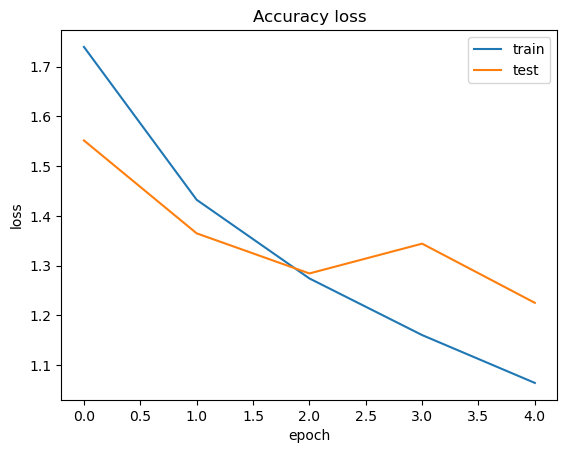

In [25]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Accuracy loss')
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('CNNv2_loss.png')


actual lable is happiness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
predicted lable is happiness


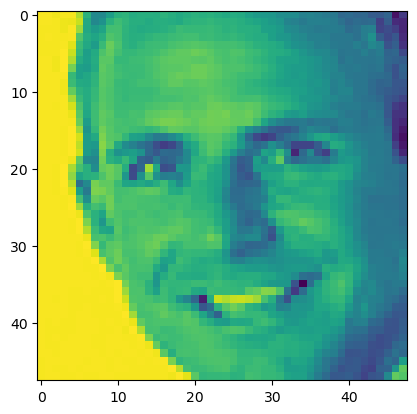

In [26]:
final_model=tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(1):
  print(f'actual lable is {label_to_text[y_test[k]]}')
  predicted_class=final_model.predict(tf.expand_dims(x_test[k],0)).argmax()
  print(f'predicted lable is {label_to_text[predicted_class]}')
  plt.imshow(x_test[k].reshape(48,48))
  plt.show()
  time.sleep(3)
  clear_output(wait=True)

In [27]:
final_model.save('model_file.h5')

In [ ]:
import cv2
import numpy as np
from keras.models import load_model


model = load_model('model_file.h5')


video = cv2.VideoCapture(0)

facedetect = cv2.CascadeClassifier('C:\\Users\\MudraboinaSowryasree\\AppData\\Roaming\\Python\\Python39\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

# Define emotion labels
labels_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

while True:
    ret, frame = video.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = facedetect.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        sub_face_img = gray[y:y + h, x:x + w]
        resized = cv2.resize(sub_face_img, (48, 48))
        normalize = resized / 255.0
        reshaped = np.reshape(normalize, (1, 48, 48, 1))
        result = model.predict(reshaped)
        label = np.argmax(result)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.rectangle(frame, (x, y - 40), (x + w, y), (0, 0, 255), -1)
        cv2.putText(frame, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow("Emotion Detection", frame)

    # Press 'q' to exit the video feed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


last_frame = frame.copy()


video.release()
cv2.destroyAllWindows()

# Display the last captured frame
cv2.imshow("Last Captured Frame", last_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

In [ ]:
import cv2
import numpy as np
from keras.models import load_model


model = load_model('model_file.h5')


video = cv2.VideoCapture(0)

facedetect = cv2.CascadeClassifier('C:\\Users\\MudraboinaSowryasree\\AppData\\Roaming\\Python\\Python39\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

# Define emotion labels
labels_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

while True:
    ret, frame = video.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = facedetect.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        sub_face_img = gray[y:y + h, x:x + w]
        resized = cv2.resize(sub_face_img, (48, 48))
        normalize = resized / 255.0
        reshaped = np.reshape(normalize, (1, 48, 48, 1))
        result = model.predict(reshaped)
        label = np.argmax(result)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.rectangle(frame, (x, y - 40), (x + w, y), (0, 0, 255), -1)
        cv2.putText(frame, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow("Emotion Detection", frame)

    # Press 'q' to exit the video feed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


last_frame = frame.copy()


video.release()
cv2.destroyAllWindows()

# Display the last captured frame
cv2.imshow("Last Captured Frame", last_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
